# DTSA 5511 Final Project
Tyler Beisel

DTSA 5511 - CU Boulder

Summer 1

For my final project, I wanted to work on a NLP problem. There are lot of use cases for deep learning that have been talked about in this class, but the field of Natural Language Processing is particularly interesting to me. My goal for this project was to further refine my skills with Recurrent Neural Networks as discussed in this class, but to also experiment with other state of the art NLP solutions that are out there. 

## Project Overview

The goal of my project is to build a NLP model that can predicting the rating that a user has given a hotel based on the text review left by this user. This is a text regression problem that will let hone skills in NLP and in building neural network regressors! 

## The Dataset
I identified a dataset on Kaggle consisting of 515,000 hotel reviews across Europe. These reviews come from booking.com and the size of this dataset presents a lot of neat opportunities. 

https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

From the dataset description, I can see that data was collected for 1493 luxury hotels. I can also see that there are 17 fields. For my project, I will be using the text reviews as the feature and the review score as the response. With that, we can look to some EDA. 

## Exploratory Data Analysis (EDA)

Since this dataset is so large and contains so many fields, there is a lot of neat EDA that we can do. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tqdm
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Set random seed
seed = 22

In [3]:
data = pd.read_csv('/kaggle/input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv')

In [4]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
# Print different summary things
print(data.shape) # for dimensions of dataframe
print(data.info()) # shows datatypes and non null counts
print(data.describe()) # gives summary stats for numeric values

(515738, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-nu

The output above shows all of the different features and some interesting stats about them. We can see that this is a nice and clean dataset that is not missing any rows with the columns that we need. There do appear to be some rows that are missing the lat and long info, but that is fine since we are not using those columns. 

Looking at the dataframe though, it is clear that the reviews have been broken down into a posistive section and a negative section. For our use case, we will want this combined into one review column. 

In [6]:
data['Negative_Review'][0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [7]:
data['Positive_Review'][0]

' Only the park outside of the hotel was beautiful '

In [8]:
complete_review = [neg + ' ' + pos for neg, pos in zip(data['Negative_Review'], data['Positive_Review'])]
data['complete_review'] = complete_review

Now we have a column in our dataframe that contains the entire review!

Text(0.5, 1.0, 'Histogram of Review Score')

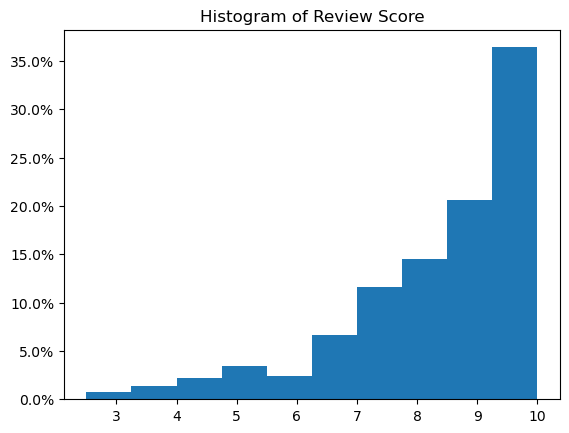

In [9]:
plt.hist(data['Reviewer_Score'], weights=np.ones(len(data['Reviewer_Score'])) / len(data['Reviewer_Score']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Histogram of Review Score')

This histogram of the review scores is quite telling that a lot of our reviews were positive. As we saw above, the average review score is 8.4. This is somewhat expected given that our dataset is specifically for luxury hotels. This will be good to keep in mind as we build our model

In [10]:
print(len(data['Hotel_Name'].unique())) 

1492


Text(0.5, 1.0, 'Histogram of Hotel Average Reviews')

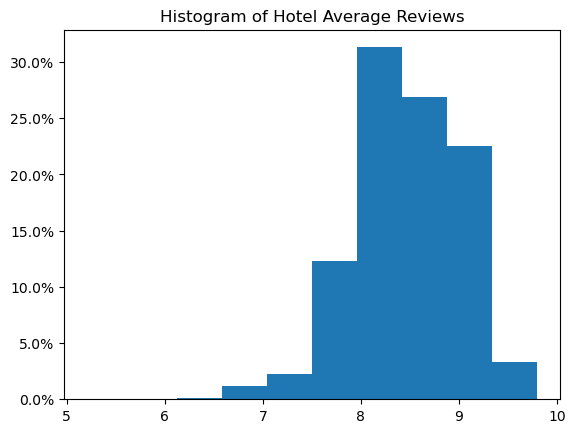

In [11]:
hotel_avgs = data.groupby(['Hotel_Name'])['Average_Score'].mean()
plt.hist(hotel_avgs, weights=np.ones(len(hotel_avgs)) / len(hotel_avgs))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Histogram of Hotel Average Reviews')

The histogram above shows the average rating for each hotel in our dataset. Given that the average review score was high, it makes since that this is high as well. 

In [12]:
positive = [1 if score >= 8 else 0 for score in data['Reviewer_Score']]
negative = [1 if score <= 3 else 0 for score in data['Reviewer_Score']]

In [13]:
total_positive = sum(positive)
total_negative = sum(negative)
total_neutral = data.shape[0] - total_positive - total_negative

print('Percent positive: {}'.format(total_positive / data.shape[0]))
print('Percent negative: {}'.format(total_negative / data.shape[0]))
print('Percent neutral: {}'.format(total_neutral / data.shape[0]))

Percent positive: 0.6508071927994447
Percent negative: 0.007416556468594519
Percent neutral: 0.34177625073196083


We can see that 65% of our data is >= 8, 34% is < 8 and > 3, and 1% is <= 3. 

In [14]:
data['positive_flag'] = positive
data['negative_flag'] = negative

In [15]:
word_count = [len(x.split(' ')) for x in data['complete_review']]
data['word_count'] = word_count

(0.0, 300.0)

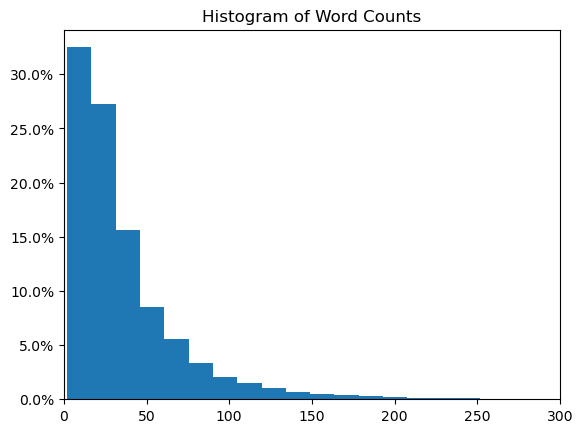

In [16]:
plt.hist(data['word_count'], weights=np.ones(len(data['word_count'])) / len(data['word_count']), bins=50)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Histogram of Word Counts')
plt.xlim(0, 300)

We can see that our word count seems to follow a sort of exponential distribution. We can also see that our word counts are pretty reasonable. 

In [17]:
pos_text = " ".join(x for x in data.loc[data['positive_flag'] == 1, :]['complete_review'])

Text(0.5, 1.0, 'Positive Review Word Cloud')

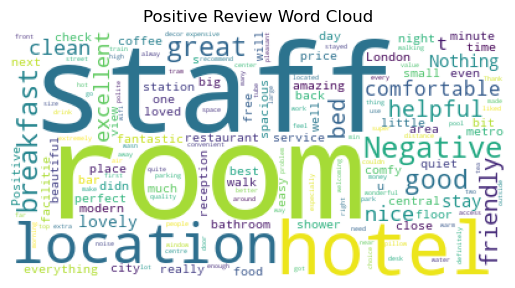

In [18]:
word_cloud = WordCloud(collocations=False, background_color='white').generate(pos_text)
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Positive Review Word Cloud')

This word cloud of the positive reviews ( >= 8 ) helps us see what words are common amongst these reviews. As you would expect, the most common words are words describing hotels. 

Text(0.5, 1.0, 'Neutral / Negative Review Word Cloud')

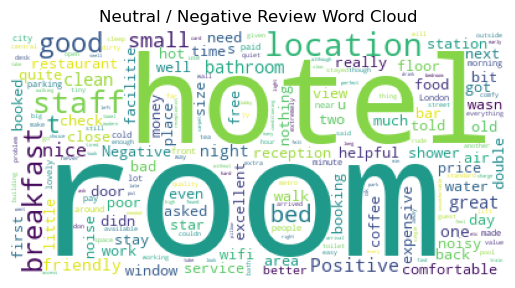

In [19]:
neutral_text = " ".join(x for x in data.loc[data['positive_flag'] == 0, :]['complete_review'])
word_cloud = WordCloud(collocations=False, background_color='white').generate(neutral_text)
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Neutral / Negative Review Word Cloud')

This word cloud of the negative and neutral reviews ( < 8 ) helps us see what words are common amongst these reviews. As you would expect, the most common words are words describing hotels. What interesting is that a lot of the words look pretty similar between the positive and ngeative reviews. It will be interesting to see how well our model works in spite of this!

I will next print out somne of the negative reviews just to get a feel of if it will be a doable task. As you can see below, these reviews are clearly negative, so there is hope for our regressor model!

In [20]:
negative_and_neutral = data.loc[data['positive_flag'] == 0, :]['complete_review']

for i in range(5):
    print(negative_and_neutral[i])
    print()
    print()

 I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin yo

## Data Preparation, Cleaning, and Munging

Now that we have finished our EDA, we will get our data ready for our model. The first step will be splitting our data into a train, test, and val dataset. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['Hotel_Name','complete_review']], data['Reviewer_Score'], test_size=0.15, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=seed)

In [22]:
print('Samples in train = {}'.format(len(X_train)))
print('Samples in val = {}'.format(len(X_val)))
print('Samples in test = {}'.format(len(X_test)))

Samples in train = 361016
Samples in val = 77361
Samples in test = 77361


### Baseline preds

Now that we have seperated our data into train test and val datasets, it will be helpful to do some trivial prediction methods to get baseline for our metrics. 

To start out with, we will simply try predicting the mean hotel review score on the train set for all of the hotels on the test set. 

In [58]:
mean_pred = [y_train.mean()] * len(y_test)

In [59]:
mean_absolute_error(y_test, mean_pred)

1.3142516159137443

As you can see, this gave us a MAE of 1.314. This is not terrible and is a good baseline for us to keep in mind. This was accomplished using the most trivial technique available. One obvious downside of this is that it will never predict a bad review or a perfect review

Next, we will look at using the mean for that specific hotel as our prediction. 

In [73]:
avg_lookup = hotel_avgs.to_dict()

In [74]:
hotel_mean_pred = [avg_lookup[hotel] for hotel in X_test['Hotel_Name']]

In [75]:
mean_absolute_error(y_test, hotel_mean_pred)

1.1873726634441433

As you can see, this improved our MAE to 1.187. This is another good baseline to keep in mind. One flaw with this approach though is that it requires having prior data on a hotel and can not generalize to new hotels. 

### Tokenizing

Now getting back to our data preparation, we need to tokenize our data so that we can create embeddings. To do this, we will use the keras preprocessing tokenizer. 

We will also set the max length to 250. When we looked at the word count distribution, the vast majority were under this 250 designation. 

In [23]:
## Get number of unique words for tokenizer
all_text = pos_text + neutral_text
unique = set(all_text.split(' ')) 
num_words = len(unique)
max_len = 250

In [24]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train['complete_review'])

sequences = tokenizer.texts_to_sequences(X_train['complete_review'])
sequences_train = keras.utils.pad_sequences(sequences,maxlen=max_len, padding='post')

In [25]:
print(sequences_train)
print()
print(sequences_train.shape)

[[  39    4   51 ...    0    0    0]
 [   9   23   13 ...    0    0    0]
 [1217  163  888 ...    0    0    0]
 ...
 [   9 1283  231 ...    0    0    0]
 [  21    3    8 ...    0    0    0]
 [ 327    3    5 ...    0    0    0]]

(361016, 250)


In [26]:
sequences = tokenizer.texts_to_sequences(X_val['complete_review'])
sequences_val = keras.utils.pad_sequences(sequences, maxlen=max_len, padding='post')

In [27]:
print(sequences_val)
print()
print(sequences_val.shape)

[[  9  23   7 ...   0   0   0]
 [ 42   3   9 ...   0   0   0]
 [ 21 127 128 ...   0   0   0]
 ...
 [635  71   0 ...   0   0   0]
 [185  12  26 ...   0   0   0]
 [ 17  31   4 ...   0   0   0]]

(77361, 250)


As you can see, we now have our data in a ready to use format. Each review has been transformed into a tokenized sequence of length 250. With that, we can begin training our deep learning models!

## Model Experimentation

There are two main deep learning models that I want to experiment with for this text regression problem. 

* LSTM 
* BERT

I would like to experiment further with an LSTM based Recurrent Neural Network becuase that was the best performing model in my disaster tweets assignment for week 2. It seems to be an industry standard for RNNs so it will be good to gain more practice with it.

I would also like to experiment with BERT because it is a state of the art transformer model. I am curious to see how this state of the art model compares to our LSTM. This will also give me a good chance to work with a state of the art transformer model and to grow my skills in that domain!

### LSTM

To start off with, I will experiment with a LSTM Recurrent Neural Network. This network will have a trainable TF embeddings layer that feeds into the LSTM cells followed by a fully connected network at the end for the final regression prediction. 

In [84]:
lstm_model = keras.Sequential()
lstm_model.add(layers.Embedding(num_words,128,input_length=max_len))
lstm_model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.25)))
lstm_model.add(layers.Dropout(0.25))

lstm_model.add(layers.Dense(64, activation='relu'))
lstm_model.add(layers.Dropout(0.25))
lstm_model.add(layers.Dense(32, activation='relu'))
lstm_model.add(layers.Dropout(0.25))
lstm_model.add(layers.Dense(1, activation="linear"))

In [85]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          13159424  
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

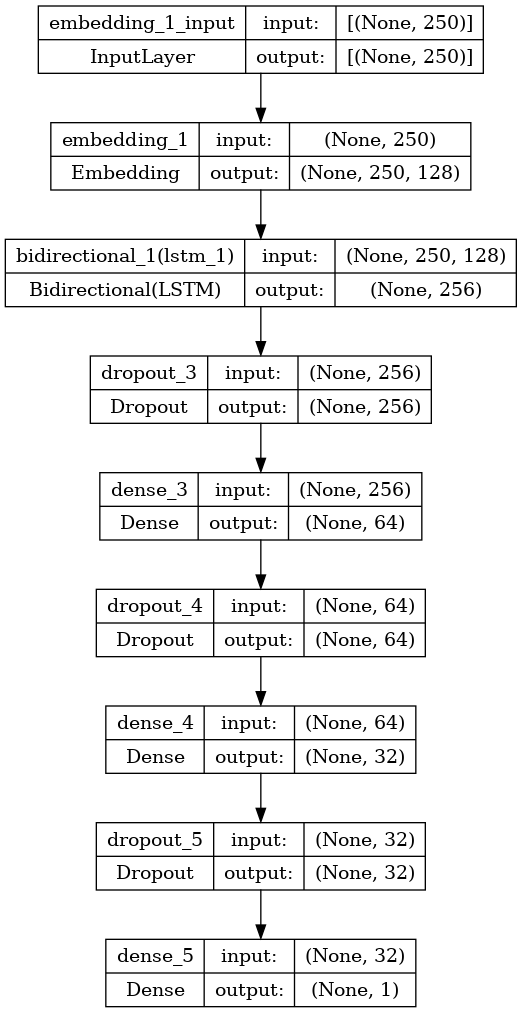

In [86]:
keras.utils.plot_model(lstm_model, show_shapes=True)

We will train for 25 epochs and will use an Adam Optimizer. 

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("lstm_{epoch}.tf"),
]
lstm_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="mean_absolute_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)
history_lstm = lstm_model.fit(
    x=sequences_train, 
    y=y_train,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(sequences_val, y_val),
    batch_size=256
)

Epoch 1/25
1411/1411 [==============================] - 167s 115ms/step - loss: 1.5057 - root_mean_squared_error: 1.9550 - val_loss: 0.8148 - val_root_mean_squared_error: 1.1076
Epoch 2/25
1411/1411 [==============================] - 117s 83ms/step - loss: 1.1950 - root_mean_squared_error: 1.5093 - val_loss: 0.8281 - val_root_mean_squared_error: 1.0695
Epoch 3/25
1411/1411 [==============================] - 113s 80ms/step - loss: 1.2137 - root_mean_squared_error: 1.5540 - val_loss: 0.8585 - val_root_mean_squared_error: 1.1362
Epoch 4/25
1411/1411 [==============================] - 115s 82ms/step - loss: 1.0643 - root_mean_squared_error: 1.3616 - val_loss: 0.8237 - val_root_mean_squared_error: 1.0915
Epoch 5/25
1411/1411 [==============================] - 114s 80ms/step - loss: 0.9809 - root_mean_squared_error: 1.2616 - val_loss: 0.8123 - val_root_mean_squared_error: 1.0830
Epoch 6/25
1411/1411 [==============================] - 114s 81ms/step - loss: 0.9191 - root_mean_squared_error: 1

In [30]:
def plot_training_results(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title('RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

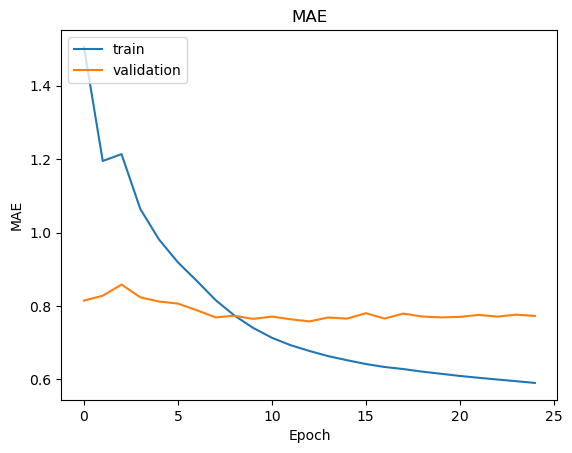

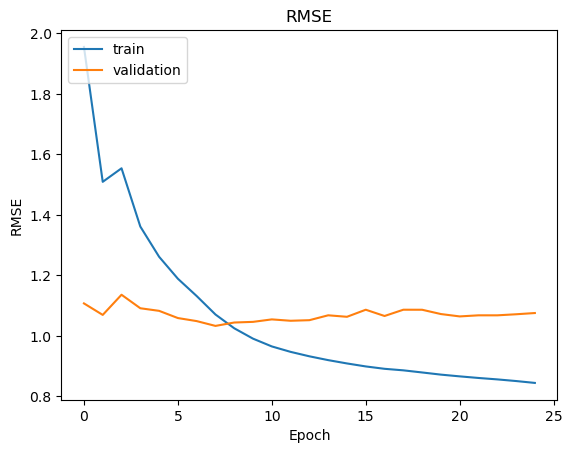

In [95]:
plot_training_results(history_lstm)

As you can see, the best MAE on the validation dataset was 0.7580. This is pretty good and our training appears to have been successful. Now, we will look at the results on the test set. 

In [96]:
pred_model = keras.Sequential()
pred_model.add(layers.Embedding(num_words,128,input_length=max_len))
pred_model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.25)))
pred_model.add(layers.Dropout(0.25))

pred_model.add(layers.Dense(64, activation='relu'))
pred_model.add(layers.Dropout(0.25))
pred_model.add(layers.Dense(32, activation='relu'))
pred_model.add(layers.Dropout(0.25))
pred_model.add(layers.Dense(1, activation="linear"))
pred_model.load_weights('/kaggle/working/lstm_13.tf')

In [32]:
sequences = tokenizer.texts_to_sequences(X_test['complete_review'])
sequences_test = keras.utils.pad_sequences(sequences, maxlen=max_len, padding='post')

In [102]:
predictions = pred_model.predict(sequences_test)

2418/2418 [==============================] - 29s 12ms/step


In [103]:
predictions

array([[9.079098 ],
       [9.891798 ],
       [8.53872  ],
       ...,
       [6.9543095],
       [9.618915 ],
       [9.6697235]], dtype=float32)

In [104]:
mean_absolute_error(y_test, predictions)

0.7615019916531169

As you can see, the mean absolute error on the test set was 0.7615. This is much better than our baseline models! Now, we will look at the BERT model

## BERT Embeddings

For our BERT model, we will use a BERT encoder from tensorflow_hub. This model also needs a pre-processer to convert the text into the format expected for the encoder. In total, our model will have:

* The BERT pre-processer
* The BERT encoder
* The fully connected network to make the regression prediction

We will use a pre-trained bert model and will not update the weights of our Encoder. This will let us see how useful the pre-trained model is!

In [24]:
import tensorflow_hub as hub

In [25]:
!pip install tensorflow-text --quiet

In [26]:
import tensorflow_text as text

In [111]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/2",
    trainable=False)
embedding_outputs = encoder(encoder_inputs)
dense_64 = layers.Dense(64, activation='relu')(embedding_outputs["pooled_output"])
dropout_1 = layers.Dropout(0.25)(dense_64)
dense_32 = layers.Dense(32, activation='relu')(dropout_1)
dropout_2 = layers.Dropout(0.25)(dense_32)
final_output = layers.Dense(1, activation="linear")(dropout_2)

In [112]:
bert_regression_model = tf.keras.Model(text_input, final_output)
bert_regression_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 keras_layer_24 (KerasLayer)    {'input_type_ids':   0           ['input_16[0][0]']               
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

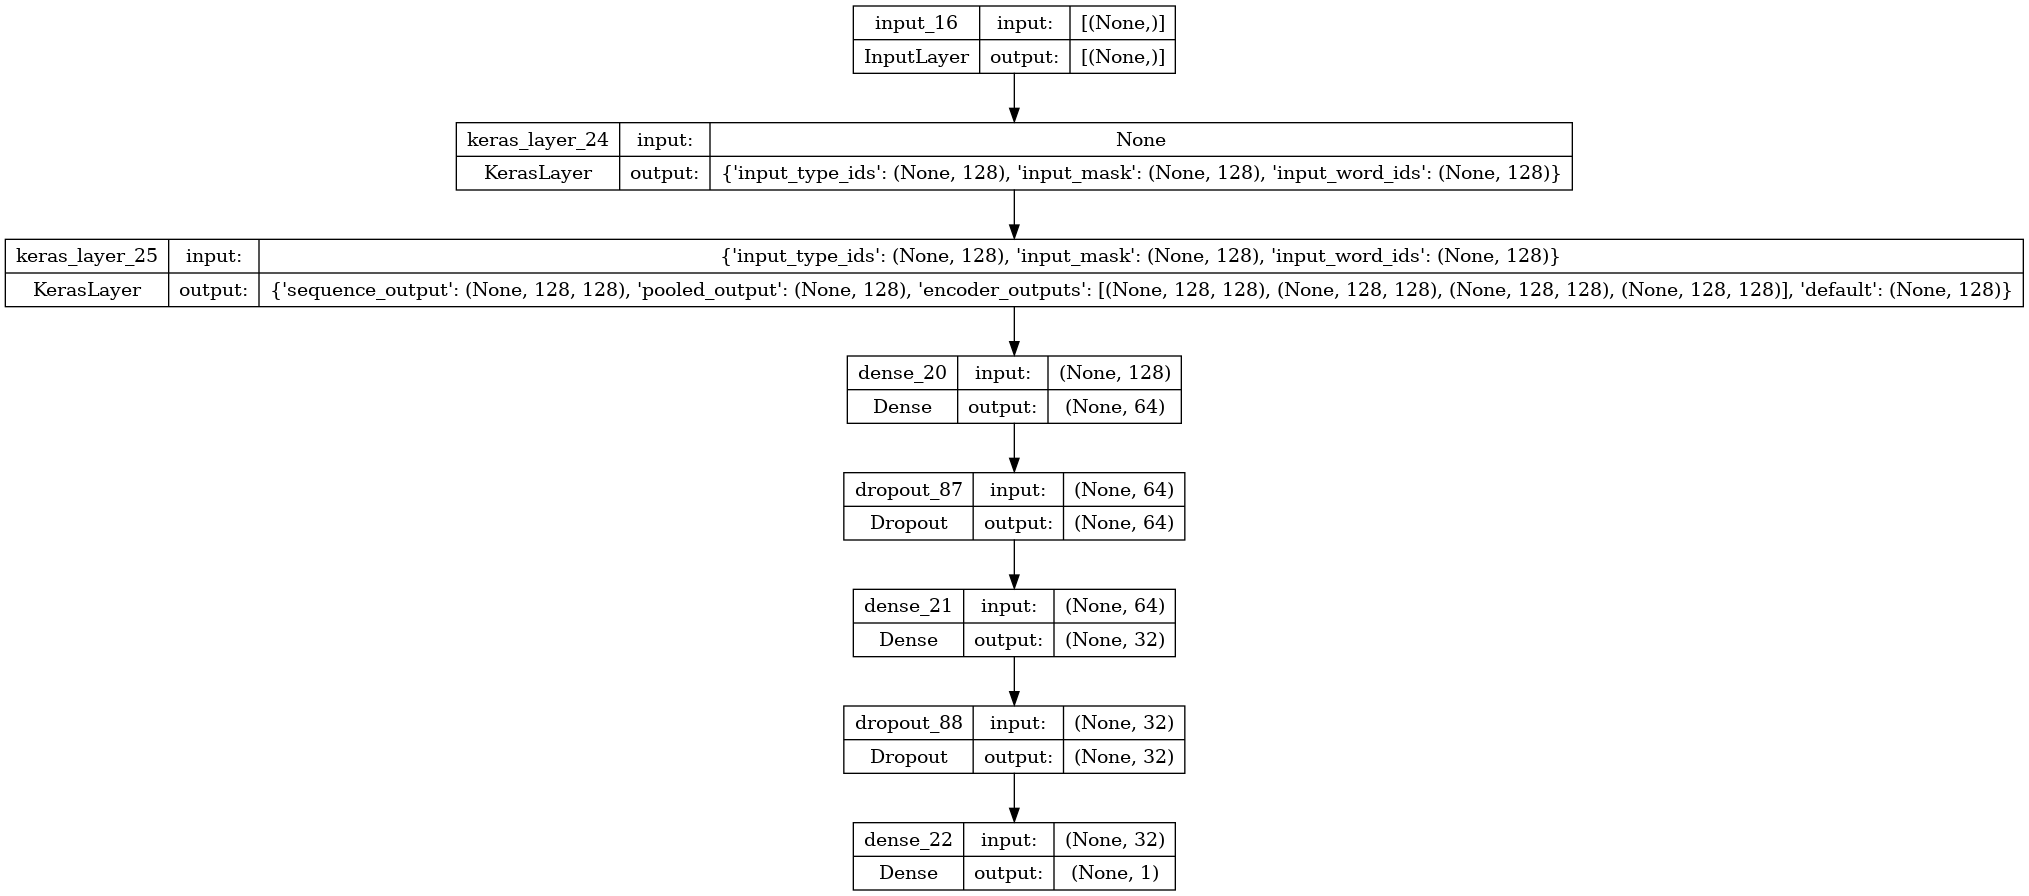

In [113]:
keras.utils.plot_model(bert_regression_model, show_shapes=True)

When training the model, I noticed that the BERT encoder takes a long time to run. For the sake of time, I am only training with a small sample of our train and validation datasets. This will ensure that the total training time is similar to that of our LSTM model. 

In [55]:
sampled_x_train = X_train['complete_review'].sample(n=10000, random_state=seed)
sampled_y_train = y_train[sampled_x_train.index]

sampled_x_val = X_val['complete_review'].sample(n=2000, random_state=seed)
sampled_y_val = y_val[sampled_x_val.index]

In [115]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("bert_{epoch}.tf"),
]
bert_regression_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="mean_absolute_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)
history_bert = bert_regression_model.fit(
    x=sampled_x_train, 
    y=sampled_y_train,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(sampled_x_val, sampled_y_val),
    batch_size=256
)

Epoch 1/25
40/40 [==============================] - 117s 3s/step - loss: 4.0156 - root_mean_squared_error: 4.8690 - val_loss: 1.5752 - val_root_mean_squared_error: 1.8386
Epoch 2/25
40/40 [==============================] - 113s 3s/step - loss: 2.0254 - root_mean_squared_error: 2.5301 - val_loss: 1.3272 - val_root_mean_squared_error: 1.6190
Epoch 3/25
40/40 [==============================] - 111s 3s/step - loss: 1.8565 - root_mean_squared_error: 2.3415 - val_loss: 1.2614 - val_root_mean_squared_error: 1.5689
Epoch 4/25
40/40 [==============================] - 111s 3s/step - loss: 1.7641 - root_mean_squared_error: 2.2162 - val_loss: 1.2385 - val_root_mean_squared_error: 1.5448
Epoch 5/25
40/40 [==============================] - 119s 3s/step - loss: 1.7630 - root_mean_squared_error: 2.2130 - val_loss: 1.2183 - val_root_mean_squared_error: 1.5271
Epoch 6/25
40/40 [==============================] - 110s 3s/step - loss: 1.7243 - root_mean_squared_error: 2.1686 - val_loss: 1.1673 - val_root_m

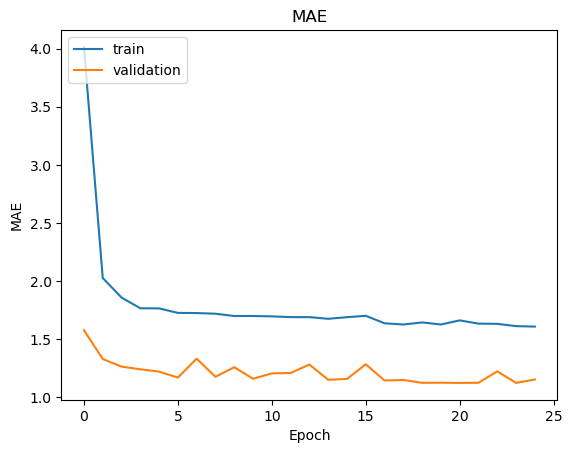

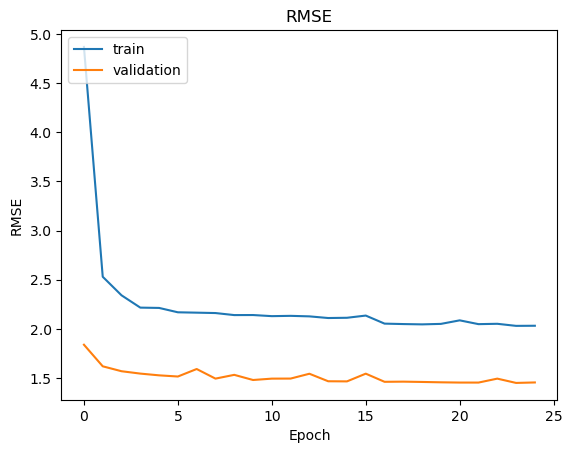

In [118]:
plot_training_results(history_bert)

As you can see, our best mean absolute error was 1.1214. This is a bit better than the baseline, but noticeably worse than our LSTM model. Now, we will look at the test dataset. 

In [119]:
pred_model = tf.keras.Model(text_input, final_output)
pred_model.load_weights('/kaggle/working/bert_21.tf')

In [120]:
predictions = pred_model.predict(X_test['complete_review'])

2418/2418 [==============================] - 172s 71ms/step


In [121]:
mean_absolute_error(y_test, predictions)

1.1361711192874704

As you can see, we obtained a 1.1362 MAE on the test dataset. This is much worse than the score obtained by the LSTM model. It is important to keep in mind though that we did not tune the BERT encoder weights and we only trained on a small subset of our data for the sake of time. 

## Hyperparameter tuning

Now, we will do some hyperparameter tuning on the LSTM since that was our better peforming model. 

There are many different things that can be tuned to try and improve performance, but given the limited GPU resources that are available to me, I can not conduct a full scale hyperparameter tuning job. Instead, I will experiment with different optimizers and see how that changes our results.


In [28]:
lstm_model_sgd = keras.Sequential()
lstm_model_sgd.add(layers.Embedding(num_words,128,input_length=max_len))
lstm_model_sgd.add(layers.Bidirectional(layers.LSTM(128, dropout=0.25)))
lstm_model_sgd.add(layers.Dropout(0.25))

lstm_model_sgd.add(layers.Dense(64, activation='relu'))
lstm_model_sgd.add(layers.Dropout(0.25))
lstm_model_sgd.add(layers.Dense(32, activation='relu'))
lstm_model_sgd.add(layers.Dropout(0.25))
lstm_model_sgd.add(layers.Dense(1, activation="linear"))

First, we will look at using a SGD optimizer. 

In [29]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("lstm_sgd_{epoch}.tf"),
]
lstm_model_sgd.compile(
    optimizer=keras.optimizers.SGD(),
    loss="mean_absolute_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)
history_lstm_sgd = lstm_model_sgd.fit(
    x=sequences_train, 
    y=y_train,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(sequences_val, y_val),
    batch_size=256
)

Epoch 1/25
1411/1411 [==============================] - 152s 102ms/step - loss: 1.8857 - root_mean_squared_error: 2.5423 - val_loss: 1.2308 - val_root_mean_squared_error: 1.5370
Epoch 2/25
1411/1411 [==============================] - 114s 81ms/step - loss: 1.3657 - root_mean_squared_error: 1.7566 - val_loss: 1.0428 - val_root_mean_squared_error: 1.4376
Epoch 3/25
1411/1411 [==============================] - 112s 80ms/step - loss: 1.2413 - root_mean_squared_error: 1.6086 - val_loss: 1.1609 - val_root_mean_squared_error: 1.6525
Epoch 4/25
1411/1411 [==============================] - 112s 79ms/step - loss: 1.1672 - root_mean_squared_error: 1.5202 - val_loss: 0.9865 - val_root_mean_squared_error: 1.3026
Epoch 5/25
1411/1411 [==============================] - 111s 79ms/step - loss: 1.1028 - root_mean_squared_error: 1.4477 - val_loss: 1.2934 - val_root_mean_squared_error: 1.5597
Epoch 6/25
1411/1411 [==============================] - 111s 78ms/step - loss: 1.0500 - root_mean_squared_error: 1

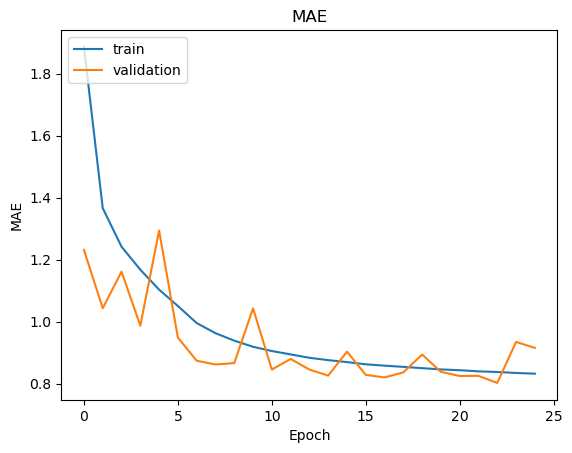

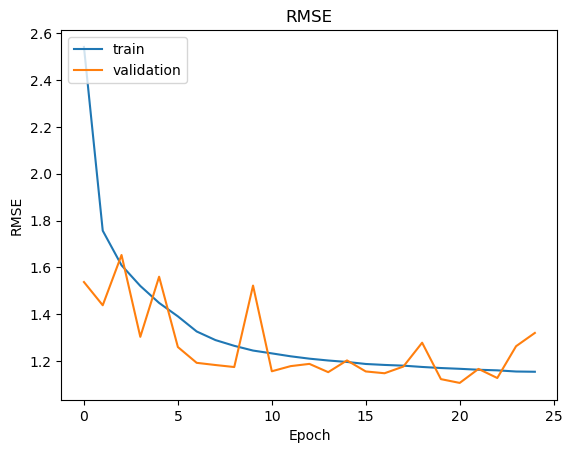

In [31]:
plot_training_results(history_lstm_sgd)

In [33]:
pred_model = keras.Sequential()
pred_model.add(layers.Embedding(num_words,128,input_length=max_len))
pred_model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.25)))
pred_model.add(layers.Dropout(0.25))

pred_model.add(layers.Dense(64, activation='relu'))
pred_model.add(layers.Dropout(0.25))
pred_model.add(layers.Dense(32, activation='relu'))
pred_model.add(layers.Dropout(0.25))
pred_model.add(layers.Dense(1, activation="linear"))
pred_model.load_weights('/kaggle/working/lstm_sgd_23.tf')

In [34]:
predictions = pred_model.predict(sequences_test)

2418/2418 [==============================] - 30s 12ms/step


In [35]:
mean_absolute_error(y_test, predictions)

0.804420942742496

As you can see, our MAE was 0.8044, which is a bit worse than our initial ADAM optimizer. Next, we will look at using an RMSprop optimizer. 

In [36]:
lstm_model_RMSprop = keras.Sequential()
lstm_model_RMSprop.add(layers.Embedding(num_words,128,input_length=max_len))
lstm_model_RMSprop.add(layers.Bidirectional(layers.LSTM(128, dropout=0.25)))
lstm_model_RMSprop.add(layers.Dropout(0.25))

lstm_model_RMSprop.add(layers.Dense(64, activation='relu'))
lstm_model_RMSprop.add(layers.Dropout(0.25))
lstm_model_RMSprop.add(layers.Dense(32, activation='relu'))
lstm_model_RMSprop.add(layers.Dropout(0.25))
lstm_model_RMSprop.add(layers.Dense(1, activation="linear"))

In [38]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("lstm_rms_{epoch}.tf"),
]
lstm_model_RMSprop.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss="mean_absolute_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)
lstm_model_RMSprop = lstm_model_RMSprop.fit(
    x=sequences_train, 
    y=y_train,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(sequences_val, y_val),
    batch_size=256
)

Epoch 1/25
1411/1411 [==============================] - 153s 104ms/step - loss: 0.9625 - root_mean_squared_error: 1.2338 - val_loss: 0.8272 - val_root_mean_squared_error: 1.0472
Epoch 2/25
1411/1411 [==============================] - 112s 80ms/step - loss: 0.9059 - root_mean_squared_error: 1.1691 - val_loss: 0.7743 - val_root_mean_squared_error: 1.0863
Epoch 3/25
1411/1411 [==============================] - 115s 81ms/step - loss: 0.8585 - root_mean_squared_error: 1.1164 - val_loss: 0.7565 - val_root_mean_squared_error: 1.0140
Epoch 4/25
1411/1411 [==============================] - 113s 80ms/step - loss: 0.8217 - root_mean_squared_error: 1.0769 - val_loss: 0.7912 - val_root_mean_squared_error: 1.0275
Epoch 5/25
1411/1411 [==============================] - 110s 78ms/step - loss: 0.7920 - root_mean_squared_error: 1.0466 - val_loss: 0.7681 - val_root_mean_squared_error: 1.0176
Epoch 6/25
1411/1411 [==============================] - 110s 78ms/step - loss: 0.7689 - root_mean_squared_error: 1

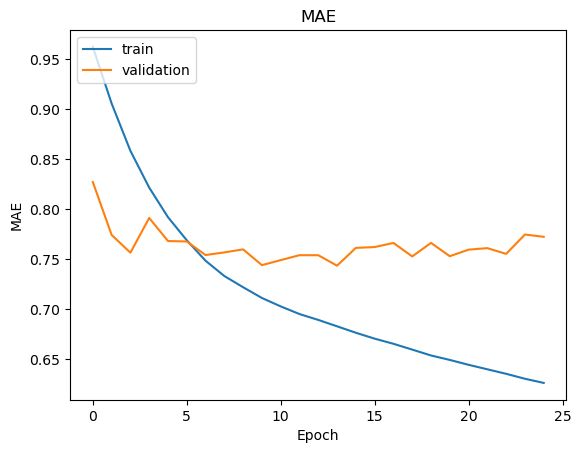

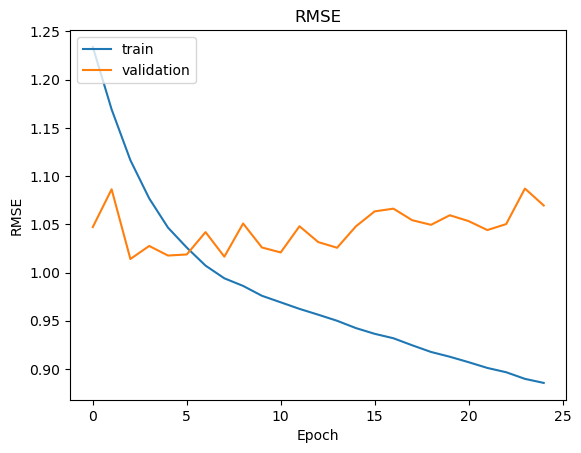

In [40]:
plot_training_results(lstm_model_RMSprop)

In [41]:
pred_model = keras.Sequential()
pred_model.add(layers.Embedding(num_words,128,input_length=max_len))
pred_model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.25)))
pred_model.add(layers.Dropout(0.25))

pred_model.add(layers.Dense(64, activation='relu'))
pred_model.add(layers.Dropout(0.25))
pred_model.add(layers.Dense(32, activation='relu'))
pred_model.add(layers.Dropout(0.25))
pred_model.add(layers.Dense(1, activation="linear"))
pred_model.load_weights('/kaggle/working/lstm_rms_14.tf')

In [42]:
predictions = pred_model.predict(sequences_test)

2418/2418 [==============================] - 32s 13ms/step


In [43]:
mean_absolute_error(y_test, predictions)

0.7451039745168432

As you can see, our RMSprop optimizer model performed slightly better than our initial model. This is our best performing model from this experiment!

## Results and Analysis

The following table summarizes the results from our experiments

| Model | Test Mean Absolute Error | Trainable Params |
|---|---|---|
| Simple Mean Model | 1.314 | 0 |
| Hotel Mean Model | 1.187 | 0 |
| LSTM with Adam | 0.762 | 13,441,153 |
| BERT Model | 1.136 | 10,369 |
| LSTM with SGD | 0.804 | 13,441,153 |
| *LSTM with RMSprop* | 0.745 | 13,441,153 |

It is clear that our LSTM RNN with the RMSprop optimizer was our best performing model! 

## Conclusion

This project was a great chance for me to refine my skills working with Deep Learning models, Natural Language Processing, and Recurrent Neural Networks. I got to practice with building RNNs from scratch, and I also experimented with a state of the art transformer model. 

All in all, this class has been a great chance to learn more about Keras and deep learning in general. 

In my experiments for this project, I found that the LSTM model perfomed the best, followed by the BERT model, followed by the simple approaches. This makes sense, given our LSTM model was trained specifically for our problem. 

There are a handful of improvements that I would love to experiment with given the time. They can be seen below:

* Conduct a full scale hyperparameter tuning job for the LSTM model
* Experiment with other BERT models
* Experiment without freezing the weights of the BERT model
* Experiment with other RNNs like GRU